<a href="https://colab.research.google.com/github/ihska/codsoft/blob/main/Survived_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("/content/archive.zip")

In [4]:
df.shape

(418, 12)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df['Survived'].isnull().values.any()

False

In [7]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns',inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875


In [9]:
inputs = df.drop('Survived',axis='columns')
target = df.Survived

In [10]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [11]:
df.Survived.unique()

array([0, 1])

In [12]:
target

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [13]:
inputs

,Pclass,Sex,Age,Fare
0,3,male,34.5,7.8292
1,3,female,47.0,7.0000
2,2,male,62.0,9.6875
3,3,male,27.0,8.6625
4,3,female,22.0,12.2875
...,...,...,...,...
413,3,male,NaN,8.0500
414,1,female,39.0,108.9000
415,3,male,38.5,7.2500
416,3,male,NaN,8.0500


In [14]:
inputs.Sex = inputs.Sex.map({'male': 1, 'female': 2})

In [15]:
inputs.Sex

0      1
1      2
2      1
3      1
4      2
      ..
413    1
414    2
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int64

In [16]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,34.5,7.8292
1,3,2,47.0,7.0000
2,2,1,62.0,9.6875
3,3,1,27.0,8.6625
4,3,2,22.0,12.2875
...,...,...,...,...
413,3,1,NaN,8.0500
414,1,2,39.0,108.9000
415,3,1,38.5,7.2500
416,3,1,NaN,8.0500


<Axes: xlabel='Sex', ylabel='Survived'>

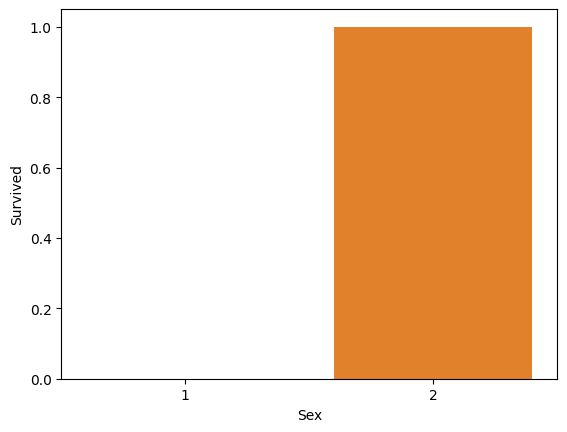

In [17]:
sns.barplot(x=inputs.Sex,y=df.Survived)

<Axes: xlabel='Pclass', ylabel='Survived'>

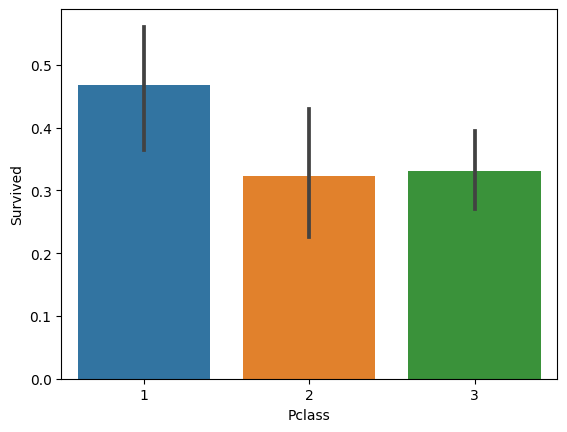

In [18]:
sns.barplot(x=inputs.Pclass,y=df.Survived)

In [19]:
inputs.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [20]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

<Axes: xlabel='Age', ylabel='Survived'>

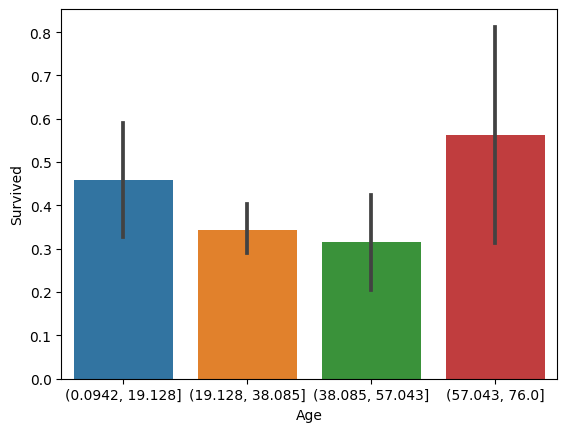

In [21]:
Age_Range=pd.cut(inputs['Age'],4)
sns.barplot(x=Age_Range,y=df.Survived)

In [22]:
inputs.Age

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
inputs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Sex     418 non-null    int64  
 2   Age     418 non-null    float64
 3   Fare    417 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.2 KB


In [25]:
X_train, X_test, y_train, y_test = train_test_split(inputs,target,test_size=0.2)

In [59]:
inputs.isnull().sum().sum()

0

In [61]:
target.isnull().sum().sum()

0

In [64]:
X_test

,Pclass,Sex,Age,Fare
159,3,2,26.00000,13.7750
174,3,1,40.00000,31.3875
181,1,1,37.00000,83.1583
228,3,1,40.50000,15.1000
213,2,2,60.00000,26.0000
...,...,...,...,...
386,3,1,24.00000,7.7750
249,3,2,30.27259,14.4542
256,3,1,30.27259,7.7500
217,1,1,57.00000,164.8667


In [ ]:
temp=model.predict(X_test)
temp

In [26]:
X_train

,Pclass,Sex,Age,Fare
277,2,1,40.00000,26.0000
295,3,1,26.00000,7.8958
233,3,1,30.27259,7.8792
312,3,1,30.27259,7.5750
67,1,1,47.00000,42.4000
...,...,...,...,...
59,1,2,36.00000,262.3750
329,2,1,21.00000,13.0000
192,3,1,11.50000,14.5000
409,3,2,3.00000,13.7750


In [27]:
len(X_train)

334

In [83]:
len(X_test)

84

In [29]:
df.isnull().values.any()

True

In [30]:
df.isnull()

,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
413,False,False,False,True,False
414,False,False,False,False,False
415,False,False,False,False,False
416,False,False,False,True,False


In [31]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [32]:
df.isnull()

,Survived,Pclass,Sex,Age,Fare
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
413,False,False,False,True,False
414,False,False,False,False,False
415,False,False,False,False,False
416,False,False,False,True,False


In [82]:
inputs.dropna()

,Pclass,Sex,Age,Fare
0,3,1,34.50000,7.8292
1,3,2,47.00000,7.0000
2,2,1,62.00000,9.6875
3,3,1,27.00000,8.6625
4,3,2,22.00000,12.2875
...,...,...,...,...
413,3,1,30.27259,8.0500
414,1,2,39.00000,108.9000
415,3,1,38.50000,7.2500
416,3,1,30.27259,8.0500


In [33]:
df.dropna()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
...,...,...,...,...,...
409,1,3,female,3.0,13.7750
411,1,1,female,37.0,90.0000
412,1,3,female,28.0,7.7750
414,1,1,female,39.0,108.9000


In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [35]:
X_train

,Pclass,Sex,Age,Fare
277,2,1,40.00000,26.0000
295,3,1,26.00000,7.8958
233,3,1,30.27259,7.8792
312,3,1,30.27259,7.5750
67,1,1,47.00000,42.4000
...,...,...,...,...
59,1,2,36.00000,262.3750
329,2,1,21.00000,13.0000
192,3,1,11.50000,14.5000
409,3,2,3.00000,13.7750


In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())

In [38]:
df.Age=inputs.Age.fillna(inputs.Age.mean())

In [39]:
df.loc[df['Age'].isnull(),'value_is_NaN'] = 'Yes'
df.loc[df['Age'].notnull(), 'value_is_NaN'] = 'No'

print (df)

     Survived  Pclass     Sex       Age      Fare value_is_NaN
0           0       3    male  34.50000    7.8292           No
1           1       3  female  47.00000    7.0000           No
2           0       2    male  62.00000    9.6875           No
3           0       3    male  27.00000    8.6625           No
4           1       3  female  22.00000   12.2875           No
..        ...     ...     ...       ...       ...          ...
413         0       3    male  30.27259    8.0500           No
414         1       1  female  39.00000  108.9000           No
415         0       3    male  38.50000    7.2500           No
416         0       3    male  30.27259    8.0500           No
417         0       3    male  30.27259   22.3583           No

[418 rows x 6 columns]


In [40]:
df['Age'].isnull().sum()

0

In [41]:
df['Age'].dropna()

0      34.50000
1      47.00000
2      62.00000
3      27.00000
4      22.00000
         ...   
413    30.27259
414    39.00000
415    38.50000
416    30.27259
417    30.27259
Name: Age, Length: 418, dtype: float64

In [42]:
df['Age'].isnull().values.any()

False

In [79]:
df.isnull()

,Survived,Pclass,Sex,Age,Fare,value_is_NaN
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
413,False,False,False,False,False,False
414,False,False,False,False,False,False
415,False,False,False,False,False,False
416,False,False,False,False,False,False


In [78]:
inputs.isnull().values.any()

False

In [77]:
target.isnull().values.any()

False

In [76]:
df.isnull().values.any()

False

In [75]:
df.isnull().sum().sum()

0

In [ ]:
y_pred=model.predict(X_test)

In [74]:
inputs

,Pclass,Sex,Age,Fare
0,3,1,34.50000,7.8292
1,3,2,47.00000,7.0000
2,2,1,62.00000,9.6875
3,3,1,27.00000,8.6625
4,3,2,22.00000,12.2875
...,...,...,...,...
413,3,1,30.27259,8.0500
414,1,2,39.00000,108.9000
415,3,1,38.50000,7.2500
416,3,1,30.27259,8.0500


In [73]:
df['Survived'].isnull().values.any()

False

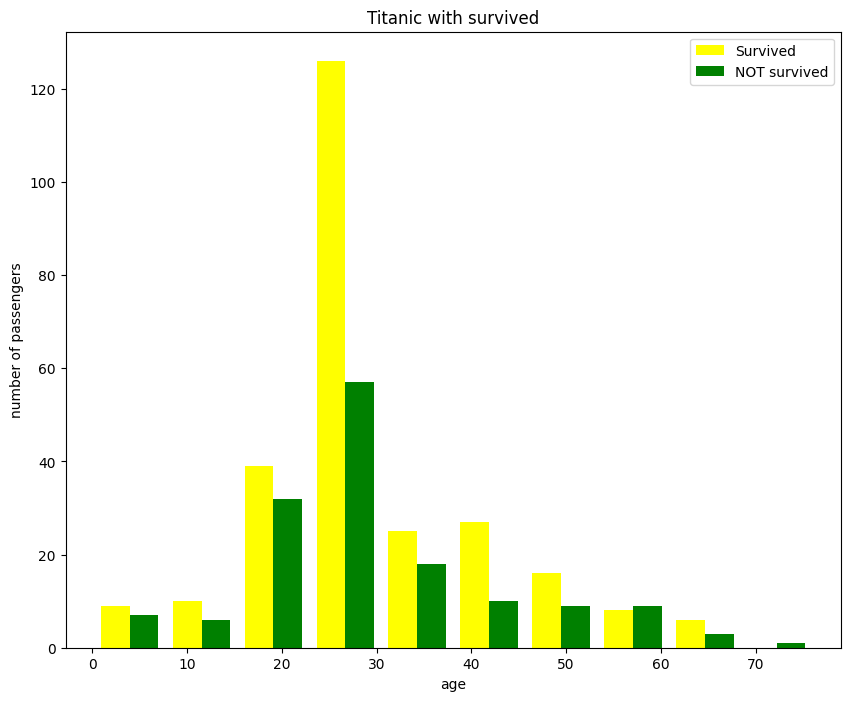

In [72]:
fig = plt.figure(figsize=(10,8))
plt.hist(x=[df[df['Survived']==0]['Age'],df[df['Survived']==1]['Age']],color=['yellow','green'],label = ['Survived','NOT survived'])
plt.title('Titanic with survived')
plt.xlabel('age')
plt.ylabel('number of passengers')
plt.legend()

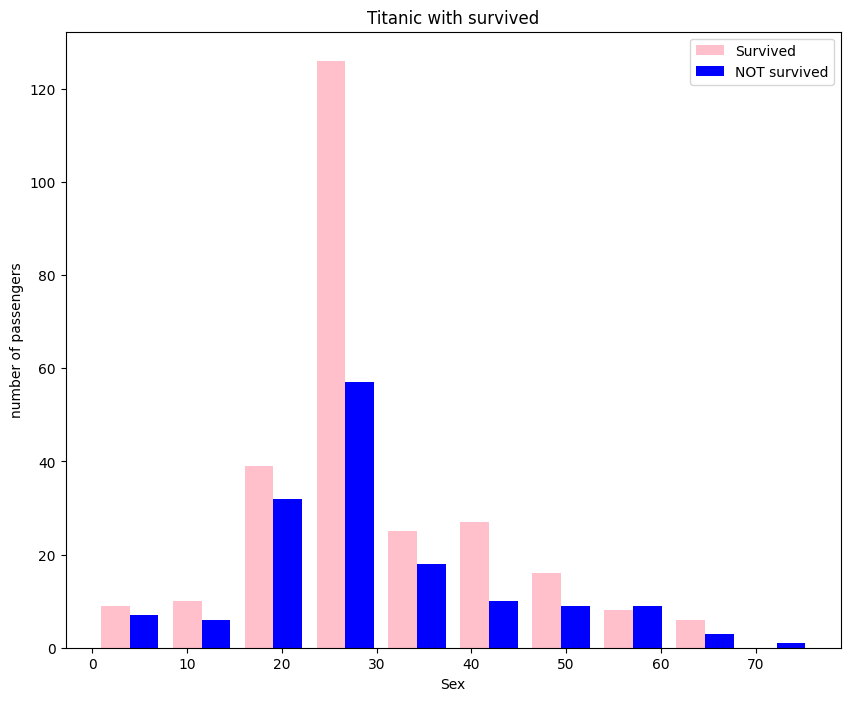

In [71]:
fig = plt.figure(figsize=(10,8))
plt.hist(x=[df[df['Survived']==0]['Age'],df[df['Survived']==1]['Age']],color=['pink','blue'],label = ['Survived','NOT survived'])
plt.title('Titanic with survived')
plt.xlabel('Sex')
plt.ylabel('number of passengers')
plt.legend()

In [70]:
df['Age'].isnull().values.any()

False

In [69]:
df['Fare'].isnull().values.any()

False

In [68]:
df['Sex'].isnull().values.any()

False

In [67]:
df['Pclass'].isnull().values.any()

False

In [66]:
target.isnull().sum().sum()

0

In [65]:
df.Fare=inputs.Fare.fillna(inputs.Fare.mean())

In [57]:
inputs['Fare'].isnull().sum().sum()

0

In [56]:
df.isnull().sum().sum()

1

In [54]:
inputs.Fare=inputs.Fare.fillna(inputs.Fare.mean())